In [12]:
# Initial imports
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np

In [13]:
file = '../Resources/Contributions_2013.csv'
IC_2013 = pd.read_csv(file,index_col='CandidateName')
uncleaned = pd.read_csv(file,index_col=False)
IC_2013.head()

/Users/Abir/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Election,CandidateID,Date,Name,ContributerType,BoroughName,City,State,ZipCode,ContributionState,Amount,MatchAmt,PrevAmt,PayMethod,TotalAmount
CandidateName,,,,,,,,,,,,,,,,
"Coenen, Jr., Kevin P",0,2013,1286,1/25/2013,"Coenen, Kevin P",Candidate,Other,Nesconset,NY,11767.0,NY,10.0,0.0,0.0,Credit Card,10.0
"Coenen, Jr., Kevin P",1,2013,1286,4/17/2013,"Walter, Dorsey",Individual,Manhattan,New York,NY,10150.0,NaN,175.0,175.0,0.0,Credit Card,350.0
"Coenen, Jr., Kevin P",2,2013,1286,1/25/2013,"Coenen, Kevin P",Candidate,Other,Nesconset,NY,11767.0,NaN,-10.0,0.0,0.0,Unknown,-10.0
"Marks, Philip A",3,2013,1551,2/13/2012,"Marks, Philip",Candidate,Brooklyn,Brooklyn,NY,11236.0,NY,400.0,175.0,0.0,Check,575.0
"Marks, Philip A",4,2013,1551,2/28/2013,"Marks, Philip",Candidate,Brooklyn,Brooklyn,NY,11236.0,NY,100.0,0.0,400.0,Cash,500.0


In [14]:
IC_2013['ZipCode'] = IC_2013['ZipCode'].apply(str)

In [15]:
IC_2013_df = IC_2013.drop(columns=['ContributionState','PayMethod','Name','CandidateID','Unnamed: 0','Election','BoroughName','Amount','PrevAmt'])
total_groupby = IC_2013_df.groupby(['CandidateName']).sum(['TotalAmount']).sort_values('TotalAmount',ascending=False)
total_groupby 

,MatchAmt,TotalAmount
CandidateName,,
"de Blasio, Bill",926504.0,1.497036e+07
"Quinn, Christine C",689206.0,1.209154e+07
"Thompson, Jr., William C",417722.0,6.111452e+06
"Lhota, Joseph J",592210.0,4.981273e+06
"Hidary, Jack D",75302.0,6.760667e+05
"Salgado, Erick J",41929.0,4.948541e+05
"Liu, John C",0.0,4.045000e+05
"Weiner, Anthony D",0.0,2.301887e+05
"Albanese, Sal F",0.0,3.092800e+04


<AxesSubplot:xlabel='CandidateName'>

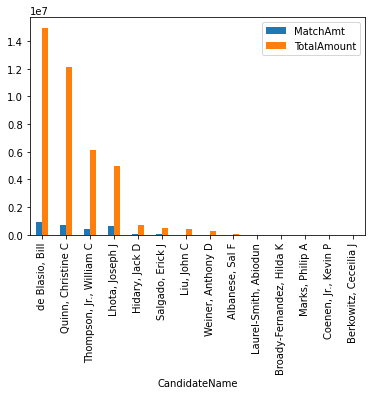

In [16]:
total_groupby.plot.bar()

In [17]:
outcome = []
for i in uncleaned['CandidateName']:
    if i == 'de Blasio, Bill':
        outcome.append('W')
    else:
        outcome.append('L')

IC_2013_df['Outcome'] = outcome
IC_2013_df.head()

,Date,ContributerType,City,State,ZipCode,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,
"Coenen, Jr., Kevin P",1/25/2013,Candidate,Nesconset,NY,11767.0,0.0,10.0,L
"Coenen, Jr., Kevin P",4/17/2013,Individual,New York,NY,10150.0,175.0,350.0,L
"Coenen, Jr., Kevin P",1/25/2013,Candidate,Nesconset,NY,11767.0,0.0,-10.0,L
"Marks, Philip A",2/13/2012,Candidate,Brooklyn,NY,11236.0,175.0,575.0,L
"Marks, Philip A",2/28/2013,Candidate,Brooklyn,NY,11236.0,0.0,500.0,L


In [18]:
IC_2013_df['Date'] = pd.to_datetime(IC_2013_df['Date'])
IC_2013_df.head()

,Date,ContributerType,City,State,ZipCode,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,
"Coenen, Jr., Kevin P",2013-01-25,Candidate,Nesconset,NY,11767.0,0.0,10.0,L
"Coenen, Jr., Kevin P",2013-04-17,Individual,New York,NY,10150.0,175.0,350.0,L
"Coenen, Jr., Kevin P",2013-01-25,Candidate,Nesconset,NY,11767.0,0.0,-10.0,L
"Marks, Philip A",2012-02-13,Candidate,Brooklyn,NY,11236.0,175.0,575.0,L
"Marks, Philip A",2013-02-28,Candidate,Brooklyn,NY,11236.0,0.0,500.0,L


In [19]:
IC_2013_df.isnull().count()

Date               47777
ContributerType    47777
City               47777
State              47777
ZipCode            47777
MatchAmt           47777
TotalAmount        47777
Outcome            47777
dtype: int64

In [20]:
# IC_2013_df = IC_2013_df.dropna()
# IC_2013_df.isnull().sum()

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
le = LabelEncoder()
# IC_2013_df['CandidateName']= le.fit_transform(IC_2013_df['CandidateName'])
IC_2013_df['Date'] = le.fit_transform(IC_2013_df['Date'])
IC_2013_df['ContributerType'] = le.fit_transform(IC_2013_df['ContributerType'])
IC_2013_df['City'] = le.fit_transform(IC_2013_df['City'])
# IC_2013_df['Amount'] = le.fit_transform(IC_2013_df['Amount'])
IC_2013_df['State'] = le.fit_transform(IC_2013_df['State'])
IC_2013_df['ZipCode'] = le.fit_transform(IC_2013_df['ZipCode'])
IC_2013_df['MatchAmt'] = le.fit_transform(IC_2013_df['MatchAmt'])
# IC_2013_df['PrevAmt'] = le.fit_transform(IC_2013_df['PrevAmt'])
IC_2013_df['TotalAmount'] = le.fit_transform(IC_2013_df['TotalAmount'])
IC_2013_df['Outcome'] = le.fit_transform(IC_2013_df['Outcome'])
IC_2013_df.head()

,Date,ContributerType,City,State,ZipCode,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,
"Coenen, Jr., Kevin P",1119,0,1573,51,512,0,121,0
"Coenen, Jr., Kevin P",1201,4,1600,51,71,95,403,0
"Coenen, Jr., Kevin P",1119,0,1573,51,512,0,106,0
"Marks, Philip A",812,0,293,51,327,95,481,0
"Marks, Philip A",1153,0,293,51,327,0,462,0


In [22]:
X = IC_2013_df.drop('Outcome',axis = 1)

In [23]:
y = IC_2013_df['Outcome']

In [24]:
# Check the balance of our target values
y.value_counts()

0    30507
1    17270
Name: Outcome, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [27]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7891532013973412

In [28]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6051, 1586],
       [ 922, 3386]])

In [29]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.79      0.79      0.83      0.79      0.62      7637
          1       0.68      0.79      0.79      0.73      0.79      0.62      4308

avg / total       0.80      0.79      0.79      0.79      0.79      0.62     11945

